# <span style="color:green"> ESERCITAZIONE 11 </span>

### <span style="color:blue">  Esercizio 11.2 </span> 
<span style="color:blue"> 1. Estendi il modello di rete neurale dell'esercizio $11.1$ per fare la regressione del seguente polinomio del terzo ordine: </span> 

<span style="color:blue">
\begin{equation}
   f(x)=4-3x-2x^2+3x^3, \quad x \in [-1,1].
\end{equation} </span> 

<span style="color:blue"> Fare delle scelte ragionevoli per: numero di layer, numero di neuroni in ogni layer, funzione di attivazione, ottimizzatore, funzione costo. </span> 

<span style="color:blue"> Valutare la bontà della regressione svolta dalla rete neurale per $f(x)$: prima nell'intervallo $[-1,1]$, poi fuori da questo intervallo. </span> 

Il polinomio di cui faremo la regressione ha questa forma. Prima lo scrivo in forma generalizzata, poi sostituisco i parametri richiesti dall'esercizio. Per questo esercizio non esegure le caselle che iniziano con le righe di # : queste saranno da eseguire nel prossimo esercizio.

In [1]:
#Digitare sulla riga di comando da terminale:
#module load python3/anaconda, per aprire i jupyter-notebook.
#source activate DeepLearning, per attivare Tensorflow e Keras.
#Eseguire questo passaggio prima di aprire il jupyter-notebook, altrimenti non funziona.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Definisco la funzione polinomio con i parametri a, b, c, d come coefficienti.
def polinomio(x,a,b,c,d):
    return a*x*x*x + b*x*x + c*x + d

In [4]:
#Assegno i parametri al polinomio.
a =  3
b = -2
c = -3
d =  4

In [5]:
#ASSEGNAZIONI ESERCIZIO 11.2.

#Noise standard deviation = rumore sui dati iniziali.
#Se ne cambio i valori, i dati/punti rossi non sono sul polinomio, ma piu' sparsi.
sigma = 0.1 

#Numero di dati di training e di test.
n_train = 10000
n_test = 1000

#Numero di epoche e di elementi del gruppetto in cui suddivido i dati.
n_epochs = 60
n_batch = 32

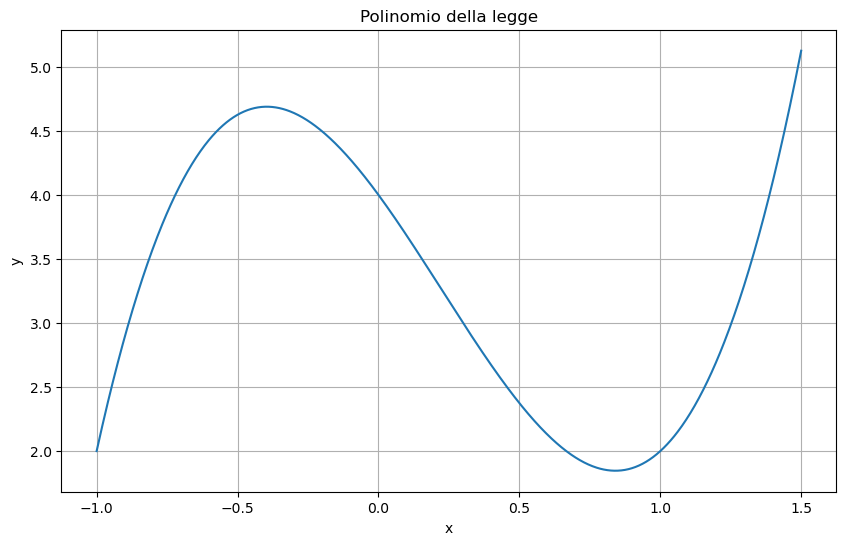

In [6]:
#Disegno il polinomio sostituiendo i valori richiesti dall'esercizio.
plt.figure(figsize=(10,6))
x = np.linspace(-1.0,1.5,1000)

plt.plot(x,polinomio(x,3,-2,-3,4))

plt.title('Polinomio della legge')
plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)
plt.show()

In [7]:
print('sigma =', sigma)
print('numero di dati di training =', n_train)
print('numero di dati di test =', n_test)
print('numero di dati nel batch =', n_batch)
print('numero di epoche =', n_epochs)

sigma = 0.1
numero di dati di training = 10000
numero di dati di test = 1000
numero di dati nel batch = 32
numero di epoche = 60


In [8]:
np.random.seed(0) #Genero dati tra -1 e 1 per x, Gaussiana per y.
x_train = np.random.uniform(-1, 1, n_train) #Dati di training.
x_valid = np.random.uniform(-1, 1, n_test) #Dati di test.

x_valid.sort() #Li metto in ordine per visualizzarli meglio.
y_target = polinomio(x_valid,a,b,c,d) #Target: funzione polinomio ideale. Non conosco la legge!

#Misure attuali da cui faremo la regressione.
#A partire da questi punti di coordinate x-y trovo la legge che li rappresenta.
y_train = np.random.normal(polinomio(x_train,a,b,c,d), sigma) #y di train.
y_valid = np.random.normal(polinomio(x_valid,a,b,c,d), sigma) #y di test.

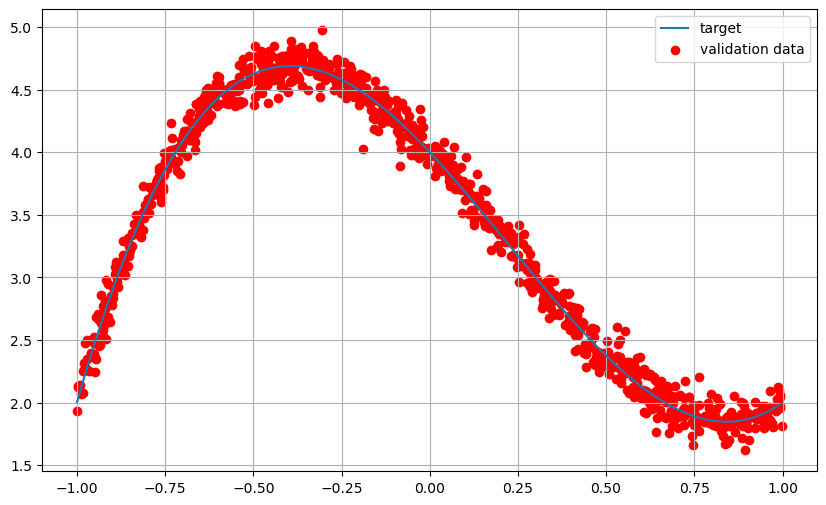

In [9]:
#Faccio il grafico del punti con cui faro' la regressione. 
plt.figure(figsize=(10,6))

#Io non conosco questa legge: ho dei punti da cui devo estrapolare il polinomio che fa la regressione.
plt.plot(x_valid, y_target, label='target') #Polinomio della legge con le x dei dati di test.
plt.scatter(x_valid, y_valid, color='r', label='validation data') #Dati di test: i punti rossi.

plt.legend()
plt.grid(True)
plt.show()

In [10]:
#Per trovare il modello per la regressione del polinomio, costruisco un modello di rete neurale, NN.
import tensorflow as tf #Importo le librerie generiche per costruire le reti neurali.
from tensorflow import keras

#Importo le librerire specifiche per costruire il modello di rete neurale.
#Elementi: modello del layer, come interagiscono i layer, tipo della funzione di attivazione.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#Importo le librerie per stampare le caratteristiche e le prestazioni.
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

2024-06-18 15:53:14.531247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
#ASSEGNAZIONI ESERCIZIO 11.2.1 E 11.2.2.a.A.
model = tf.keras.Sequential() #Definisco il modello del layer: tanti neuroni in linea retta.

#input_shape=(1,) = il neurone lavora con un solo tipo di dato iniziale: x, funzione R->R.
#Dense = tipo di interazione tra i neuroni: tutti interagiscono con tutti.
#Relu è la funzione di attivazione, che modifica la forma del dato di input nel neurone.
#L'ultimo layer deve avere 1 neurone, perche' deve restituire un solo parametro y in funzione di x.

model.add(Dense(16, input_shape=(1,), activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(4, activation='relu')) 
model.add(Dense(1, activation='relu')) 

#Compilo il modello scegliendo ottimizzatore, funzione costo e metrica.
#sdg = stocastic gradient descent, mse = mean square error. 
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2024-06-18 15:53:19.549094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 15:53:19.549586: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
####################################################################
#ASSEGNAZIONI ESERCIZIO 11.2.2.a.B: MODIFICA FUNZIONE DI ATTIVAZIONE.
model = tf.keras.Sequential()

model.add(Dense(16, input_shape=(1,), activation='elu')) 
model.add(Dense(8, activation='elu')) 
model.add(Dense(4, activation='elu')) 
model.add(Dense(1, activation='elu')) 

#sdg = stocastic gradient descent, mse = mean square error. 
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [31]:
####################################################################
#ASSEGNAZIONI ESERCIZIO 11.2.2.a.C: MODIFICA FUNZIONE DI ATTIVAZIONE.
model = tf.keras.Sequential()

model.add(Dense(16, input_shape=(1,), activation='selu')) 
model.add(Dense(8, activation='selu')) 
model.add(Dense(4, activation='selu')) 
model.add(Dense(1, activation='selu')) 

#sdg = stocastic gradient descent, mse = mean square error. 
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [37]:
####################################################################
#ASSEGNAZIONI ESERCIZIO 11.2.2.a.D: MODIFICA FUNZIONE DI ATTIVAZIONE.
model = tf.keras.Sequential()

model.add(Dense(16, input_shape=(1,), activation='sigmoid')) 
model.add(Dense(8, activation='sigmoid')) 
model.add(Dense(4, activation='sigmoid')) 
model.add(Dense(1, activation='sigmoid')) 

#sdg = stocastic gradient descent, mse = mean square error. 
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [11]:
##########################################################
#ASSEGNAZIONI ESERCIZIO 11.2.2.b.A: MODIFICA OTTIMIZZATORE.
model = tf.keras.Sequential()

model.add(Dense(16, input_shape=(1,), activation='elu')) 
model.add(Dense(8, activation='elu')) 
model.add(Dense(4, activation='elu')) 
model.add(Dense(1, activation='elu')) 

#sdg = stocastic gradient descent, mse = mean square error. 
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2024-06-18 15:18:30.286052: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 15:18:30.286550: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
##########################################################
#ASSEGNAZIONI ESERCIZIO 11.2.2.b.B: MODIFICA OTTIMIZZATORE.
model = tf.keras.Sequential()

model.add(Dense(16, input_shape=(1,), activation='elu')) 
model.add(Dense(8, activation='elu')) 
model.add(Dense(4, activation='elu')) 
model.add(Dense(1, activation='elu')) 

#sdg = stocastic gradient descent, mse = mean square error. 
model.compile(optimizer='adagrad', loss='mse', metrics=['mse'])

In [24]:
##########################################################
#ASSEGNAZIONI ESERCIZIO 11.2.2.b.C: MODIFICA OTTIMIZZATORE.
model = tf.keras.Sequential()

model.add(Dense(16, input_shape=(1,), activation='elu')) 
model.add(Dense(8, activation='elu')) 
model.add(Dense(4, activation='elu')) 
model.add(Dense(1, activation='elu')) 

#sdg = stocastic gradient descent, mse = mean square error. 
model.compile(optimizer='adadelta', loss='mse', metrics=['mse'])

In [30]:
##########################################################
#ASSEGNAZIONI ESERCIZIO 11.2.2.b.D: MODIFICA OTTIMIZZATORE.
model = tf.keras.Sequential()

model.add(Dense(16, input_shape=(1,), activation='elu')) 
model.add(Dense(8, activation='elu')) 
model.add(Dense(4, activation='elu')) 
model.add(Dense(1, activation='elu')) 

#sdg = stocastic gradient descent, mse = mean square error. 
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [38]:
############################################################
#ASSEGNAZIONI ESERCIZIO 11.2.2.c.A: MODIFICA FUNZIONE COSTO.
model = tf.keras.Sequential()

model.add(Dense(16, input_shape=(1,), activation='elu')) 
model.add(Dense(8, activation='elu')) 
model.add(Dense(4, activation='elu')) 
model.add(Dense(1, activation='elu')) 

#sdg = stocastic gradient descent, mse = mean square error. 
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [44]:
############################################################
#ASSEGNAZIONI ESERCIZIO 11.2.2.c.B: MODIFICA FUNZIONE COSTO.
model = tf.keras.Sequential()

model.add(Dense(16, input_shape=(1,), activation='elu')) 
model.add(Dense(8, activation='elu')) 
model.add(Dense(4, activation='elu')) 
model.add(Dense(1, activation='elu')) 

#sdg = stocastic gradient descent, mae = mean absolute error. 
model.compile(optimizer='sgd', loss='mae', metrics=['mae'])

In [50]:
############################################################
#ASSEGNAZIONI ESERCIZIO 11.2.2.c.C: MODIFICA FUNZIONE COSTO.
model = tf.keras.Sequential()

model.add(Dense(16, input_shape=(1,), activation='elu')) 
model.add(Dense(8, activation='elu')) 
model.add(Dense(4, activation='elu')) 
model.add(Dense(1, activation='elu')) 

#sdg = stocastic gradient descent, msle = mean square logarithmic error. 
model.compile(optimizer='sgd', loss='msle', metrics=['msle'])

In [12]:
#Riassunto del modello.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Fit del modello usando training dataset: 
#numero di epoche = n_epochs, numero di dati nel gruppetto = n_batch
#Riporto il progresso dei dati di training confrontato con i dati di test.
history = model.fit(x=x_train, y=y_train, 
          batch_size=n_batch, epochs=n_epochs,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Epoch 1/60
313/313 [==============================] - 1s 3ms/step - loss: 0.5663 - mse: 0.5663 - val_loss: 0.1535 - val_mse: 0.1535
Epoch 2/60
313/313 [==============================] - 1s 2ms/step - loss: 0.0724 - mse: 0.0724 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 3/60
313/313 [==============================] - 1s 2ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 4/60
313/313 [==============================] - 1s 2ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 5/60
313/313 [==============================] - 1s 2ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 6/60
313/313 [==============================] - 1s 2ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 7/60
313/313 [==============================] - 1s 2ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 8/60
313/313 [==============================] - 1s 2ms/step - loss: 0.

In [17]:
#Restituisce i pesi e i bias = m e b. Sono i risultati della regressione lineare dell'esercizio della retta.
#Qui non ho due parametri m e b, ma ne ho tanti perche' e' un polinomio e la riga sotto non serve.
#Non e' possibile qui trovare i parametri a, b, c, d: la rete non fa un fit che trova i parametri.
#Ogni neurone ha in se un pezzettino e mettendo insieme tutti i pezzettinti fa un grafico in cui li sovrappone.
#model.get_weights()

In [14]:
#Valuta le performance del modello e le stampa.
score = model.evaluate(x_valid, y_valid, batch_size=n_batch, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.0113 - mse: 0.0113

Test loss: 0.011268268339335918
Test accuracy: 0.011268268339335918


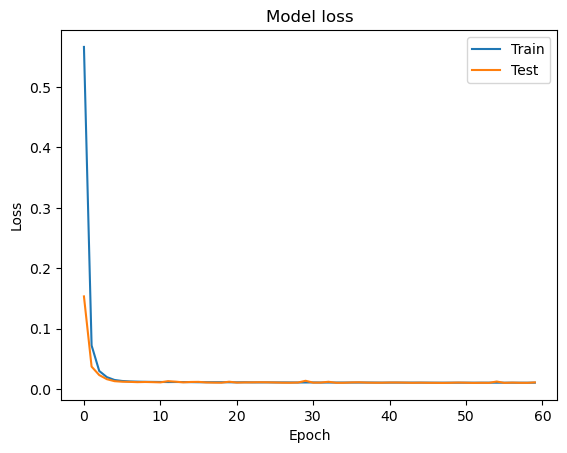

In [15]:
#Look into training history: plot training & validation loss values.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='best')
plt.show()

32/32 [==============================] - 0s 3ms/step


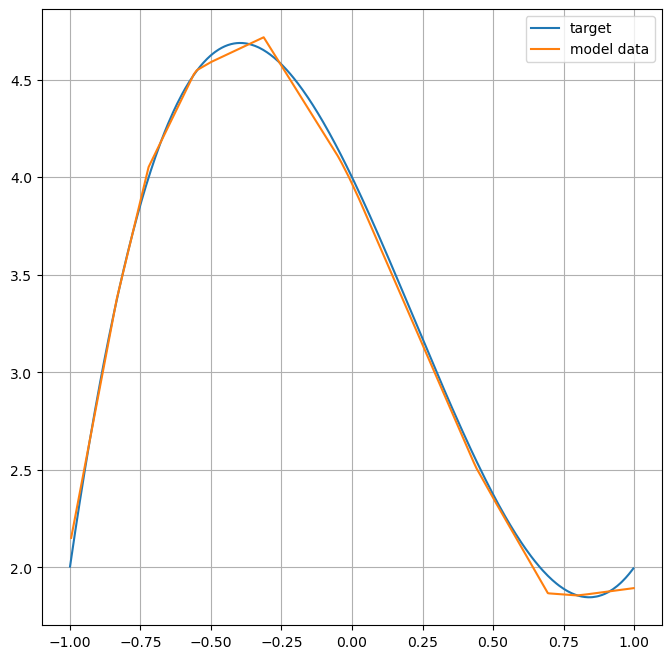

In [16]:
#Adesso ho il modello: voglio generare dei punti usandolo.
x_predicted = np.random.uniform(-1, 1, n_test) #Estraggo le x da una distribuzione uniforme.
x_predicted.sort() #Li metto in ordine. In tutto sono n_test elementi.
y_predicted = model.predict(x_predicted) #Genero le y usando il modello: applico il modello alle x.

#Faccio il grafico dei punti predicted generati con il modello.
plt.figure(figsize=(8,8))
#plt.scatter(x_predicted, y_predicted, color='r', label='model data')
plt.plot(x_valid, y_target, label='target') #Polinomio della legge.
plt.plot(x_predicted, y_predicted, label='model data') #Polinomio del modello.

plt.legend()
plt.grid(True)
plt.show()

Cosa succede se **applichiamo il modello** alla funzione ma **fuori dall'intervallo** in cui la rete neurale è **stata addestrata**? Lo vediamo nel grafico che segue.

32/32 [==============================] - 0s 1ms/step


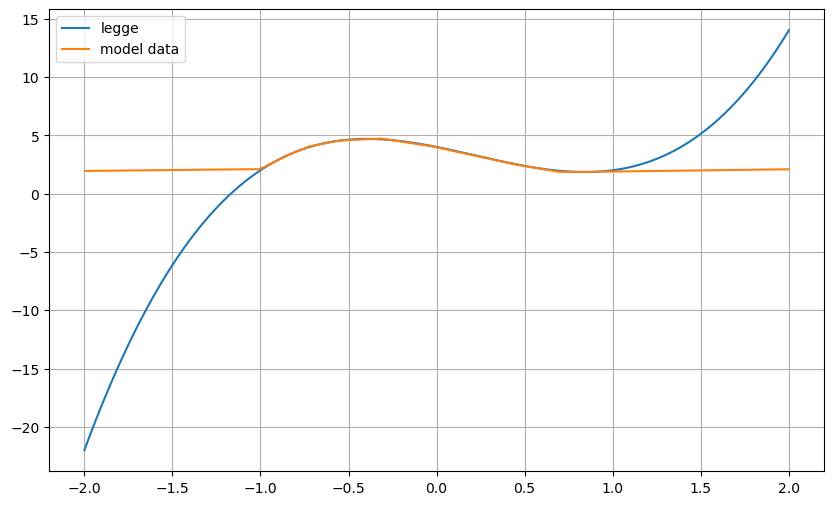

In [17]:
plt.figure(figsize=(10,6))

#PUNTI DEL MODELLO
x_predicted = np.random.uniform(-2.0, 2.0, n_test) #Estraggo le x da una distribuzione uniforme.
x_predicted.sort() #Li metto in ordine.
y_predicted = model.predict(x_predicted) #Genero le y usando il modello: applico il modello alle x.

#PUNTI DELLA LEGGE
x = np.linspace(-2.0,2.0,n_test)
plt.plot(x,polinomio(x,3,-2,-3,4), label='legge') #Polinomio della legge.

plt.plot(x_predicted, y_predicted, label='model data') #Polinomio del modello.

plt.legend()
plt.grid(True)
plt.show()

Osserviamo che le curve che rappresentano il modello trovato dalla rete neurale e il polinomio originale si sovrappongono bene nell'intervallo in cui la rete è stata addestrata, mentre **al di fuori di questo intervallo** la funzione modello è una retta parallela all'asse $x$ e **non coincide con il polinomio**.

<span style="color:blue"> 2. Sperimenta la rete neurale modificando: funzione di attivazione, ottimizzatore, funzione costo. Vedere come variano i risultati. </span>

Per ogni porzione in cui è suddiviso l'esercizio 11.2.2, eseguire le caselle che iniziano con le righe di # scritte ma non attivate nell'esercizio precedente. Eseguire le caselle a turno, per ciascuno dei casi menzionati e allocare subito i risultati nei vettori corrispondenti, eseguendo le caselle che seguono.

<span style="color:blue"> a. Modifico la funzione di attivazione. </span>

Nella prima esecuzione della rete neurale ho usato la funzione di attivazione **relu**, che modifica il dato di input come una funzione a gradino: si riconosce dal fatto che i punti sono uniti tramite segmenti e non da linee curve. Vorrei sostituire questo andamento a  segmenti con una curva che sale più dolcemente. Modifico la rete neurale scegliendo una alla volta, come funzioni di attivazione, prima la **elu**, poi la **selu** e infine la **sigmoide**.

In [23]:
#Modello 12.2.2.a.A: RELU.
x_predic_relu = np.random.uniform(-1, 1, n_test) #Estraggo le x da una distribuzione uniforme.
x_predic_relu.sort() #Li metto in ordine.
y_predic_relu = model.predict(x_predic_relu) #Genero le y usando il modello: applico il modello alle x.

32/32 [==============================] - 0s 1ms/step


In [29]:
#Modello 12.2.2.a.B: ELU.
x_predic_elu = np.random.uniform(-1, 1, n_test) #Estraggo le x da una distribuzione uniforme.
x_predic_elu.sort() #Li metto in ordine.
y_predic_elu = model.predict(x_predic_elu) #Genero le y usando il modello: applico il modello alle x.

32/32 [==============================] - 0s 2ms/step


In [36]:
#Modello 12.2.2.a.C: SELU.
x_predic_selu = np.random.uniform(-1, 1, n_test) #Estraggo le x da una distribuzione uniforme.
x_predic_selu.sort() #Li metto in ordine.
y_predic_selu = model.predict(x_predic_selu) #Genero le y usando il modello: applico il modello alle x.

32/32 [==============================] - 0s 2ms/step


In [42]:
#Modello 12.2.2.a.D: SIGMOIDE.
x_predic_sigmoid = np.random.uniform(-1, 1, n_test) #Estraggo le x da una distribuzione uniforme.
x_predic_sigmoid.sort() #Li metto in ordine.
y_predic_sigmoid = model.predict(x_predic_sigmoid) #Genero le y usando il modello: applico il modello alle x.

32/32 [==============================] - 0s 2ms/step


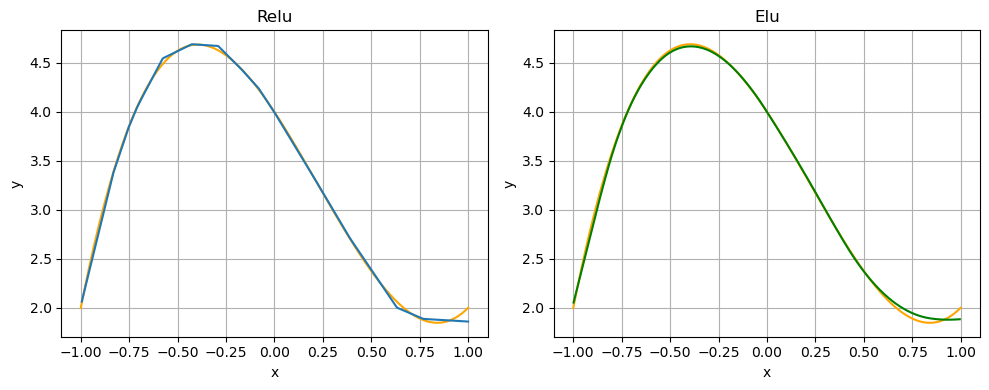

In [30]:
#FACCIO IL CONFRONTO DEI 4 GRAFICI DELLE CURVE RISULTANTI DAL MODELLO, PER LE 4 FUNZIONI DI ATTIVAZIONE.
plt.figure(figsize=(10,4))

#Polinomio della legge.
x = np.linspace(-1.0,1.0,n_test) #Punti tra -1 e 1.

#Polinomio modello con relu.
plt.subplot(121)
plt.plot(x,polinomio(x,3,-2,-3,4), label='legge', color='orange') 
plt.plot(x_predic_relu, y_predic_relu, label='model') 
plt.title('Relu')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

#Polinomio modello con elu.
plt.subplot(122)
plt.plot(x,polinomio(x,3,-2,-3,4), label='legge', color='orange') 
plt.plot(x_predic_elu, y_predic_elu, label='model', color='green') 
plt.title('Elu')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()
plt.show()

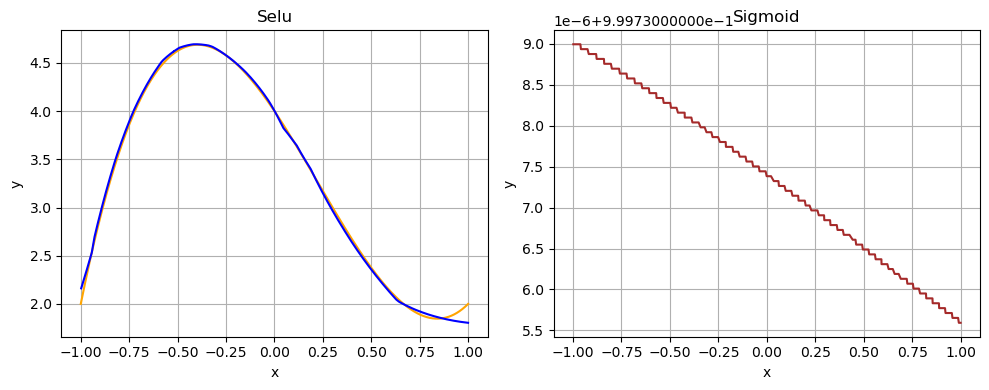

In [44]:
plt.figure(figsize=(10,4))

#Polinomio della legge.
x = np.linspace(-1.0,1.0,n_test) #Punti tra -1 e 1.

#Polinomio modello con selu.
plt.subplot(121)
plt.plot(x,polinomio(x,3,-2,-3,4), label='legge', color='orange') 
plt.plot(x_predic_selu, y_predic_selu, label='model', color='blue') 
plt.title('Selu')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

#Polinomio modello con sigmoide.
plt.subplot(122)
#plt.plot(x,polinomio(x,3,-2,-3,4), label='legge', color='orange') #Togliere il commento per fare il confronto con la legge.
plt.plot(x_predic_sigmoid, y_predic_sigmoid, label='model', color='brown') 
plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()
plt.show()

Le prime tre funzioni di attivazione hanno una loss $\simeq 10^{-2}$ che è buona. E' buona anche la sovrapposizione con la curva teorica. La sigmoide invece ha una funzione costo pari a $4$: per niente buona. Questo si vede anche dal grafico: ha una forma che non c'entra niente con le altre tre e anche le $y$ sono diverse. 

Tra tutte le curve, si sovrappone meglio alla curva teorica quella che funzione di attivazione elu. In questo esercizio ho modificato la funzione di attivazione dei neuroni e ho trovato che la **elu si sovrappone meglio** alla curva teorica, quindi la sostituisco alla relu e la tengo per lo svolgimento dei prossimi esercizi. 

<span style="color:blue"> b. Modifico l'ottimizzatore: il gradiente. </span>

In questo esercizio modifico l'ottimizzatore che è il **gradiente** che si applica alla funzione costo **per trovare la direzione giusta** per trovare il minimo. Uno tra i migliori ottimizzatori che possiamo avere è lo **stochastic gradient descent**, l'ottimizzatore **sgd** usato sempre negli esercizi precedenti. Il punto di forza di sgd è la combinazione tra l'essere un **gradiente** per poter **calcolare il minimo** e l'essere **stocastico**, ossia **esce da una direzione privilegiata** per esplorare tutto lo spazio, in modo da non rimanere intrappolato in un minimo locale. 

La funzione da minimizzare è la **loss function**, la funzione costo. Il numero dei dati di training è diviso in **batches**, in gruppetti più piccoli su ciascuno dei quali si applica il gradiente. Si fa questo perché in ciascuno di loro il connubio gradiente più stocasticità prende una direzione diversa e **se i gruppetti sono tanti si esplorano tante possibilità**, fino a trovare la direzione giusta che ci conduce al minimo assoluto.

Esistono diversi gradienti oltre a sgd. In questo esercizio ne provo altri tre, **Adagrad**, **Adadelta** e **Adam** e osservo che cosa succede. 

In [17]:
#Modello 12.2.2.b.A: STOCHASTIC GRADIENT DESCENT.
x_predic_sgd = np.random.uniform(-1, 1, n_test) #Estraggo le x da una distribuzione uniforme.
x_predic_sgd.sort() #Li metto in ordine.
y_predic_sgd = model.predict(x_predic_sgd) #Genero le y usando il modello: applico il modello alle x.

32/32 [==============================] - 0s 2ms/step


In [23]:
#Modello 12.2.2.b.B: ADAGRAD.
x_predic_adgr = np.random.uniform(-1, 1, n_test) #Estraggo le x da una distribuzione uniforme.
x_predic_adgr.sort() #Li metto in ordine.
y_predic_adgr = model.predict(x_predic_adgr) #Genero le y usando il modello: applico il modello alle x.

32/32 [==============================] - 0s 3ms/step


In [29]:
#Modello 12.2.2.b.C: ADADELTA.
x_predic_adde = np.random.uniform(-1, 1, n_test) #Estraggo le x da una distribuzione uniforme.
x_predic_adde.sort() #Li metto in ordine.
y_predic_adde = model.predict(x_predic_adde) #Genero le y usando il modello: applico il modello alle x.

32/32 [==============================] - 0s 2ms/step


In [35]:
#Modello 12.2.2.b.D: ADAM.
x_predic_adam = np.random.uniform(-1, 1, n_test) #Estraggo le x da una distribuzione uniforme.
x_predic_adam.sort() #Li metto in ordine.
y_predic_adam = model.predict(x_predic_adam) #Genero le y usando il modello: applico il modello alle x.

32/32 [==============================] - 0s 3ms/step


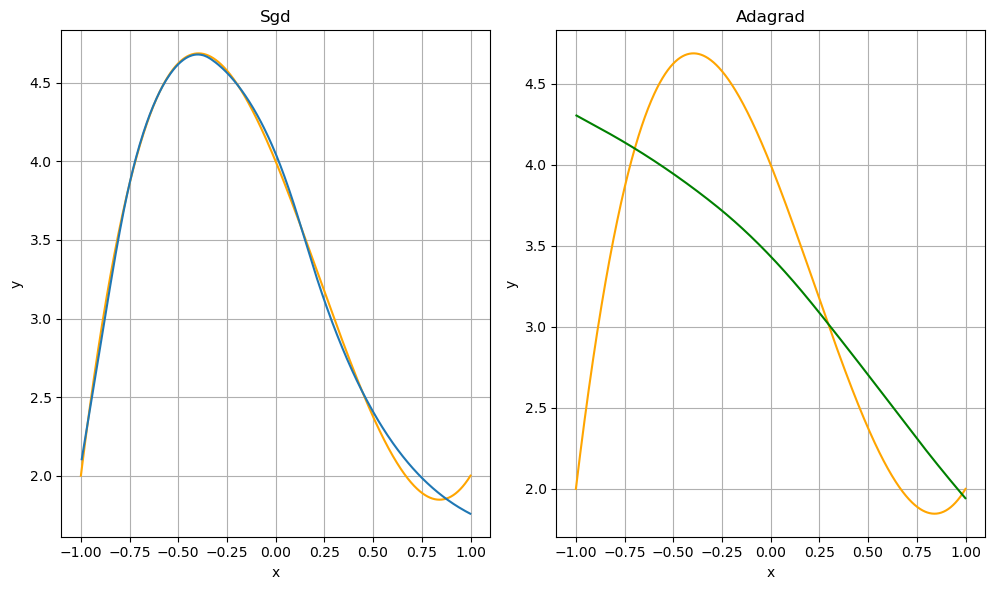

In [36]:
#FACCIO IL CONFRONTO DEI 4 GRAFICI DELLE CURVE RISULTANTI DAL MODELLO, PER I 4 OTTIMIZZATORI.
#LA FUNZIONE DI ATTIVAZIONE PER I 4 CASI E' LA ELU.
plt.figure(figsize=(15,6))

#Polinomio della legge.
x = np.linspace(-1.0,1.0,n_test) #Punti tra -1 e 1.

#Polinomio modello con sgd.
plt.subplot(131)
plt.plot(x,polinomio(x,3,-2,-3,4), label='legge', color='orange') 
plt.plot(x_predic_sgd, y_predic_sgd, label='model') 
plt.title('Sgd')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

#Polinomio modello con adagrad.
plt.subplot(132)
plt.plot(x,polinomio(x,3,-2,-3,4), label='legge', color='orange') 
plt.plot(x_predic_adgr, y_predic_adgr, label='model', color='green') 
plt.title('Adagrad')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()
plt.show()

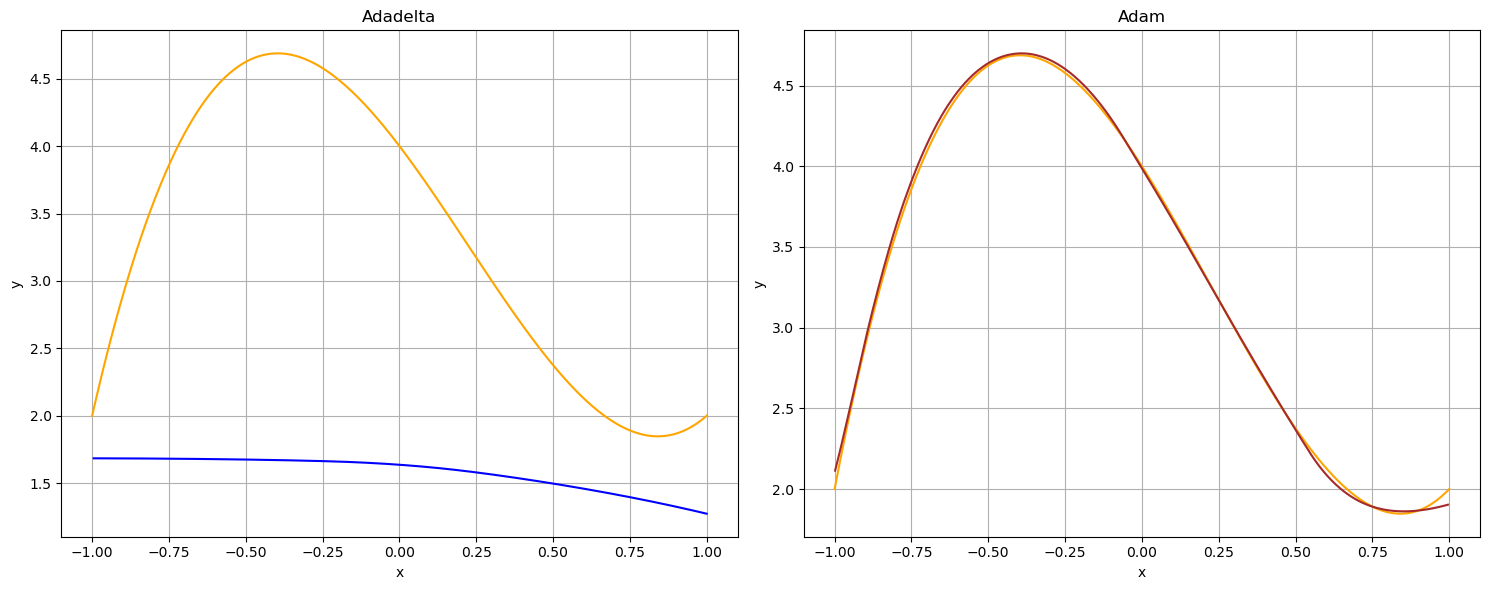

In [37]:
plt.figure(figsize=(15,6))

#Polinomio della legge.
x = np.linspace(-1.0,1.0,n_test) #Punti tra -1 e 1.

#Polinomio modello con adadelta.
plt.subplot(121)
plt.plot(x,polinomio(x,3,-2,-3,4), label='legge', color='orange') 
plt.plot(x_predic_adde, y_predic_adde, label='model', color='blue') 
plt.title('Adadelta')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

#Polinomio modello con adam.
plt.subplot(122)
plt.plot(x,polinomio(x,3,-2,-3,4), label='legge', color='orange') 
plt.plot(x_predic_adam, y_predic_adam, label='model', color='brown') 
plt.title('Adam')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()
plt.show()

Osserviamo che **sgd e adam fanno una buona regressione** dei punti: la curva sperimentale e la curva teorica hanno la stessa forma e anche se non si sovrappongono alla perfezione, sono molto vicine tra di loro; la loss è dell'ordine di $10^{-2}$ in entrambi i casi ed è buona. Nei casi sia di Adagrad sia di Adadelta non solo non c'è sovrapposizione, ma le due curve sperimentali hanno proprio una forma diversa rispetto alla curva teorica. La funzione costo è $0.44$ nel primo caso e $0.54$ nel secondo caso: non è buona.

<span style="color:blue"> c. Modifico la funzione costo. </span>

Concludo modificando il tipo di **funzione costo**, detta anche **loss**, ossia la funzione che dice se il classificatore sta svolgendo bene il suo lavoro con un dato set di parametri. A seconda del lavoro che la rete neurale deve svolgere, bisogna scegliere la funzione costo più adatta. Negli esercizi precedenti ho usato sempre la funzione costo **mean squared error**, l'errore quadratico medio, **mse**, che dice la discrepanza media al quadrato tra i valori dei dati osservati e dei dati stimati. L'obiettivo della simulazione è **minimizzare** il valore numerico della funzione costo: più è piccolo, più il risultato è preciso.

In questo esercizio sperimento altri due tipi di funzioni costo, la **mean absolute error** e la **mean squared logarithmic error** e vedo che cosa succede.

In [43]:
#Modello 12.2.2.c.A: MEAN SQUARED ERROR.
x_predic_mse = np.random.uniform(-1, 1, n_test) #Estraggo le x da una distribuzione uniforme.
x_predic_mse.sort() #Li metto in ordine.
y_predic_mse = model.predict(x_predic_mse) #Genero le y usando il modello: applico il modello alle x.

32/32 [==============================] - 0s 2ms/step


In [49]:
#Modello 12.2.2.c.B: MEAN ABSOLULTE ERROR.
x_predic_mae = np.random.uniform(-1, 1, n_test) #Estraggo le x da una distribuzione uniforme.
x_predic_mae.sort() #Li metto in ordine.
y_predic_mae = model.predict(x_predic_mae) #Genero le y usando il modello: applico il modello alle x.

32/32 [==============================] - 0s 2ms/step


In [55]:
#Modello 12.2.2.c.C: MEAN SQUARED LOGARITHMIC ERROR.
x_predic_msle = np.random.uniform(-1, 1, n_test) #Estraggo le x da una distribuzione uniforme.
x_predic_msle.sort() #Li metto in ordine.
y_predic_msle = model.predict(x_predic_msle) #Genero le y usando il modello: applico il modello alle x.

32/32 [==============================] - 0s 2ms/step


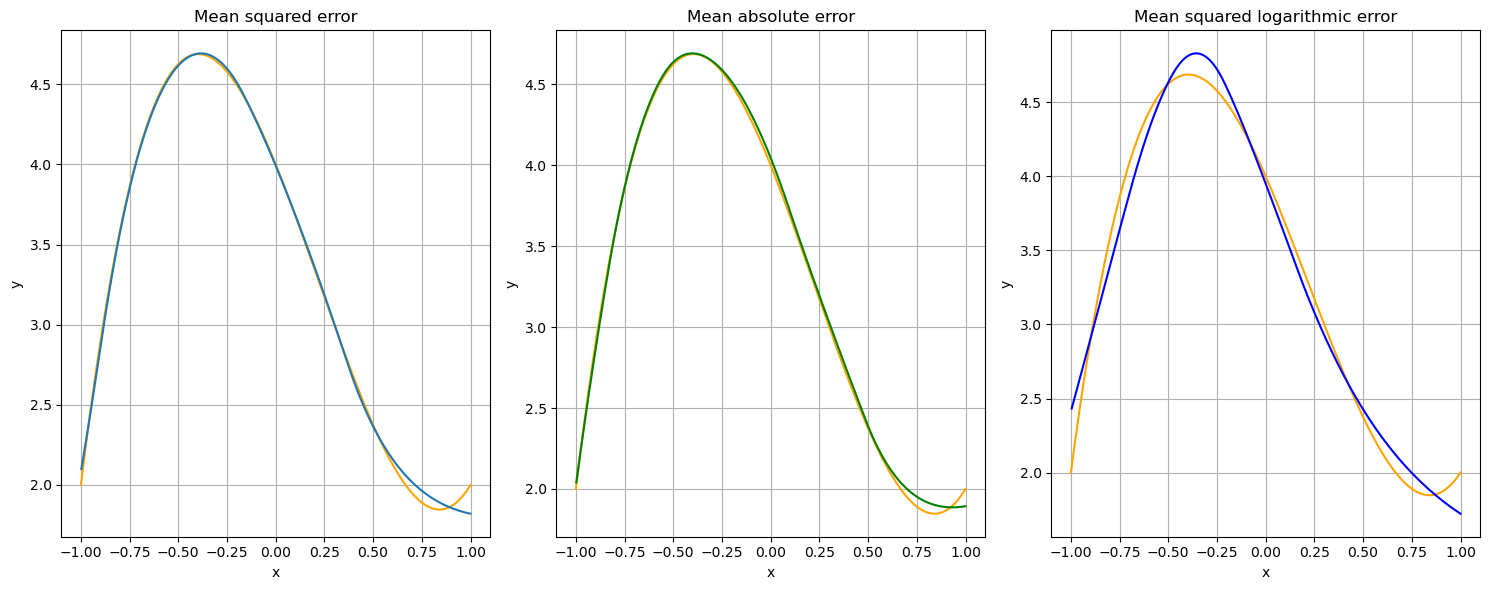

In [56]:
#FACCIO IL CONFRONTO DEI 3 GRAFICI DELLE CURVE RISULTANTI DAL MODELLO, PER LE 3 FUNZIONI COSTO.
#LA FUNZIONE DI ATTIVAZIONE PER I 3 CASI E' LA ELU, CON OTTIMIZZATORE SGD.
plt.figure(figsize=(15,6))

#Polinomio della legge.
x = np.linspace(-1.0,1.0,n_test) #Punti tra -1 e 1.

#Polinomio modello con sgd.
plt.subplot(131)
plt.plot(x,polinomio(x,3,-2,-3,4), label='legge', color='orange') 
plt.plot(x_predic_mse, y_predic_mse, label='model') 
plt.title('Mean squared error')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

#Polinomio modello con mae.
plt.subplot(132)
plt.plot(x,polinomio(x,3,-2,-3,4), label='legge', color='orange') 
plt.plot(x_predic_mae, y_predic_mae, label='model', color='green') 
plt.title('Mean absolute error')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

#Polinomio modello con msle.
plt.subplot(133)
plt.plot(x,polinomio(x,3,-2,-3,4), label='legge', color='orange') 
plt.plot(x_predic_msle, y_predic_msle, label='model', color='blue') 
plt.title('Mean squared logarithmic error')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()
plt.show()

Confrontando le curve teorica e sperimentali per le **le tre funzioni costo** si osserva: 

1. mse. Ottima sovrapposizione tra curva teorica e sperimentale, con loss $=0.00128$. E' il caso migliore.
2. mae. Buona sovrapposizione tra curva teorica e sperimentale, con loss $=0.1085$. E' meglio il caso sopra. 
3. msle. Brutta sovrapposizione tra curva teorica e sperimentale, nonstante la loss sia $=0.0016$. Non va bene. 

Osservando sia i grafici sia le accuratezze, si osserva che la **funzione costo migliore** è la mean squared error, **mse**.

### Conclusioni

Concludo dicendo che la **combinazione migliore** di elementi per il modello di rete neurale per questo esercizio è: 

1. funzione di attivazione $=$ **elu**, 2. ottimizzatore $=$ stochastic gradient descent, **sgd**, 3. funzione costo $=$ mean squared error, **mse**.

Questa è la combinazione migliore che ho trovato per questo esercizio, con questa specifica funzione da studiare e con una rete neurale con questo numero di layer ciascuno con questo numero di neuroni. Per ogni problema e per ogni NN si dovrà trovare la combinazione di elementi più adatta per lui.